In [15]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import os
import sys
from sklearn.metrics import roc_auc_score, average_precision_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import colors
sns.set(font_scale=2.5, style="whitegrid", rc={
    'figure.figsize':(8,4),
    "lines.linewidth": 3,
    "lines.markersize":20,
    "ps.useafm": True,
    "font.sans-serif": ["Helvetica"],
    "pdf.use14corefonts" : True,
    "text.usetex": True,
    })

note2id = {'Nursing/other': 900001, 'Physician': 900002, 'Nutrition': 900003, 'General': 900004, 'Nursing': 900005, 'Respiratory ': 900006,'Rehab Services': 900007, 'Social Work': 900008, 'Echo': 900010,'ECG': 900011,'Case Management ': 900012,'Pharmacy': 900013,'Consult': 900014, 'Radiology': 900015, 'Discharge summary': 900016}
model_mapping = {"DAN":"DeepAverageNetwork", "LR":"logistic_regression"}
line_sty = {"LR":"-", "DAN":"--"}
feature_map = {"notes":"notes", "all_but_notes":"structured variables", "all":"notes + structured variables"}

DATA_DIR = "/data/test_mimic_output/"
# DATA_DIR = "/data/joe/physician_notes/"

BASE_DIR = "/home/joe/value-of-medical-notes/"

In [16]:
def get_results(task, model, note, period, feature_used, metric):
    model_name = period + '.csv'
    if feature_used == "all":
        model_name = "feature_text_" + model_name
    elif feature_used == "all_but_notes":
        model_name = "feature_" + model_name
    else:
        model_name = "text_" + model_name
    df = pd.read_csv(f'{BASE_DIR}/models/{model_mapping[model]}/results/{task}/{note}/{model_name}')
#     print(f'/home/joe/physician_notes/models/sentence_select/results/{model}/{task}/{heuristics}/{model_name}')
#     print(df.columns)
    return df[df['TYPE']=="test"][metric].iloc[0]

In [17]:
def get_plot(task, notes, period, feature_used, metric):
    color_pal = sns.color_palette("colorblind", 10).as_hex()
    print(color_pal)
    for p in period:
        for n in notes:
            for me in metric:
                fig, ax = plt.subplots(figsize=(5,5))
                results = []
                p_s = []
                m_s = []
                n_s = []
                for f in feature_used:
                    for m in ["LR","DAN"]: #, "DAN"
                        results.append(get_results(task, m, n, p, f, me))
                        m_s.append(feature_map[f])
                        p_s.append(m)
                df = pd.DataFrame({"Model":m_s,"Score":results, "Period":p_s})
                ax = sns.barplot(x="Period", y="Score", hue="Model", data=df,palette="muted")
                # Define some hatches
                hatches = ['','', '-', '-', '/', '/']

                # Loop over the bars
                for i,thisbar in enumerate(ax.patches):
                    # Set a different hatch for each bar
#                     label = thisbar.get_label()
#                     print(label)
                    thisbar.set_hatch(hatches[i])
                file_name = "-".join([task, n, p, me])
                me = "PR-AUC" if me == "PRAUC" else me
                me = "ROC-AUC" if me == "ROCAUC" else me
                ax.set_ylabel(me if "@" not in me else me+"\%")
                ax.set_xlabel(None)
                handles, labels = ax.get_legend_handles_labels()
                plt.legend(handles[:], labels[:],bbox_to_anchor=(1.05, 0.75), loc=2, borderaxespad=0.,ncol=3)
                if not os.path.exists(f'figure/results/'):
                    print("create dir")
                    os.mkdir(f'figure/results/')
                plt.savefig(os.path.join(f'figure/results/',f'{file_name}.pdf'), bbox_inches = "tight")

['#0173b2', '#de8f05', '#029e73', '#d55e00', '#cc78bc', '#ca9161', '#fbafe4', '#949494', '#ece133', '#56b4e9']


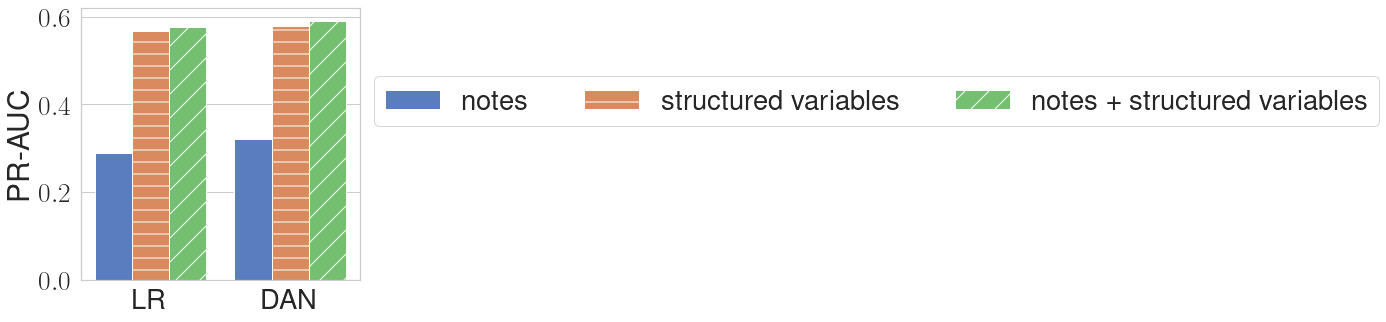

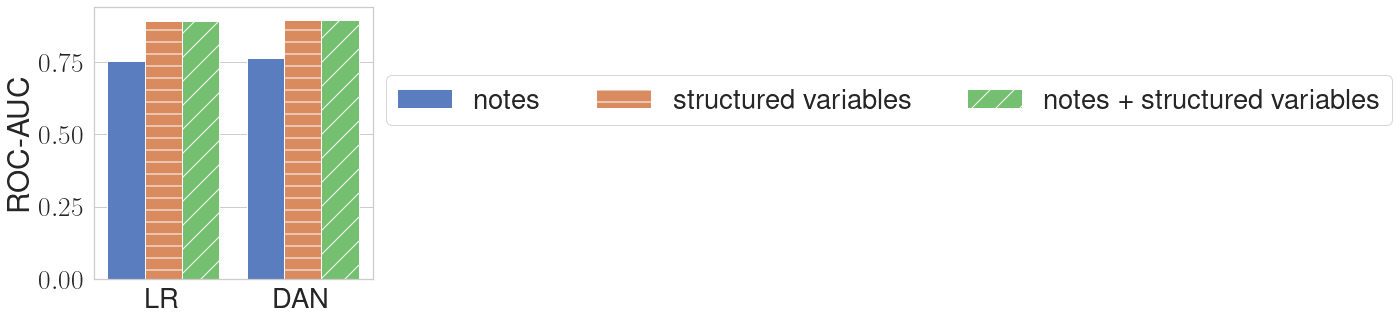

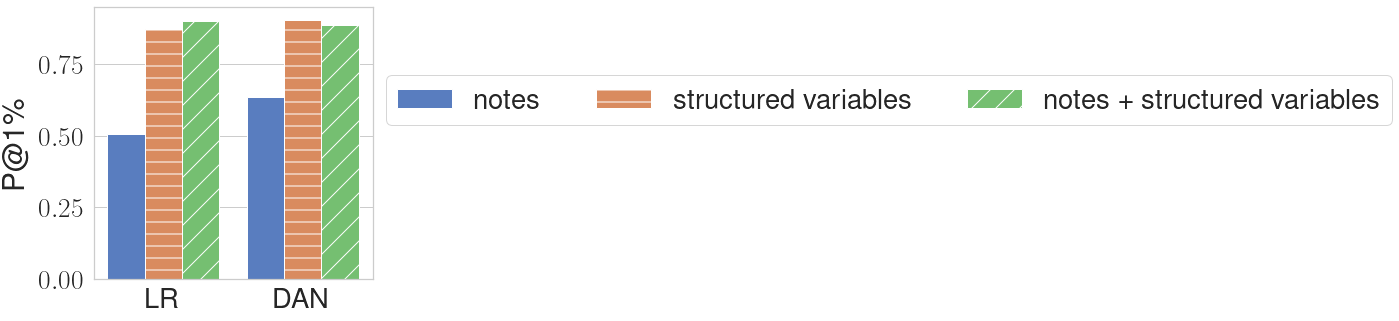

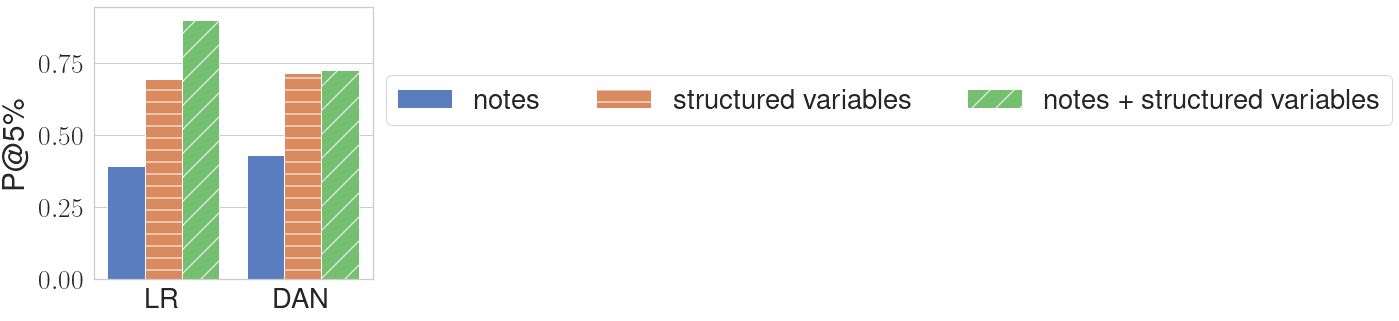

In [18]:
get_plot('mortality', ['all_but_discharge'],['24'], ['notes',"all_but_notes", "all"], 
         ['PRAUC','ROCAUC','P@1','P@5'])

['#0173b2', '#de8f05', '#029e73', '#d55e00', '#cc78bc', '#ca9161', '#fbafe4', '#949494', '#ece133', '#56b4e9']


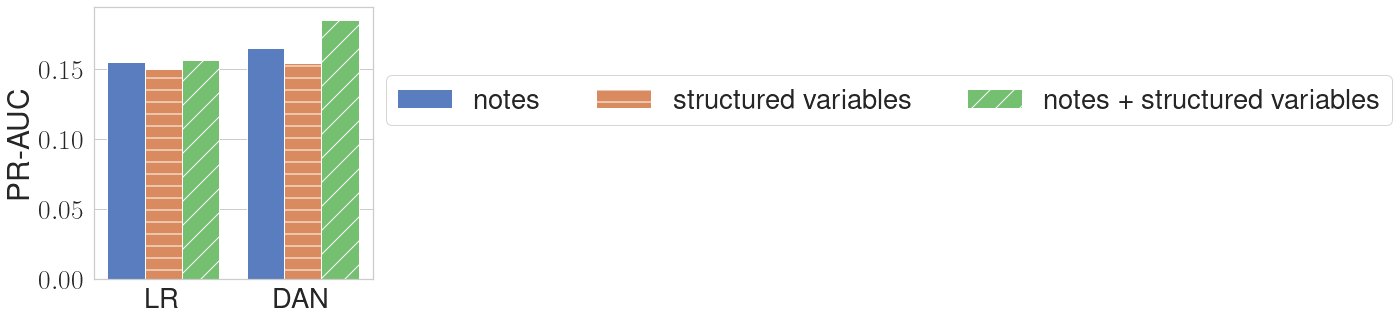

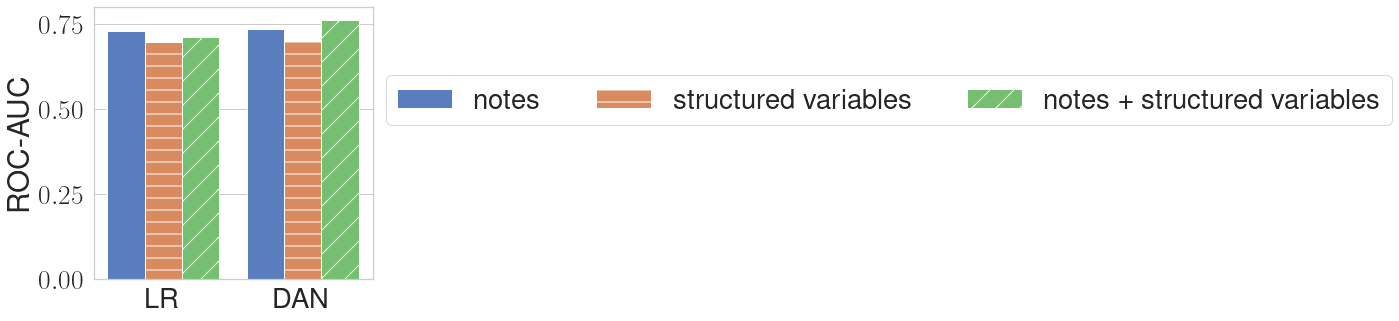

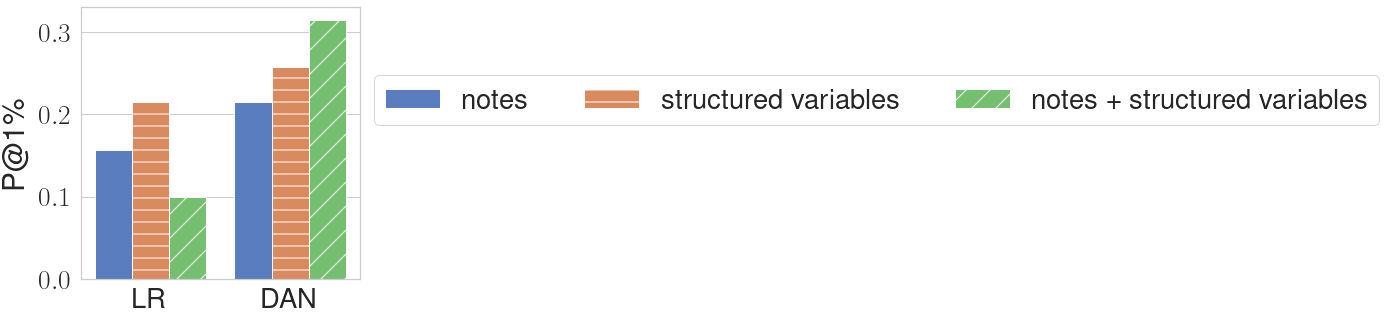

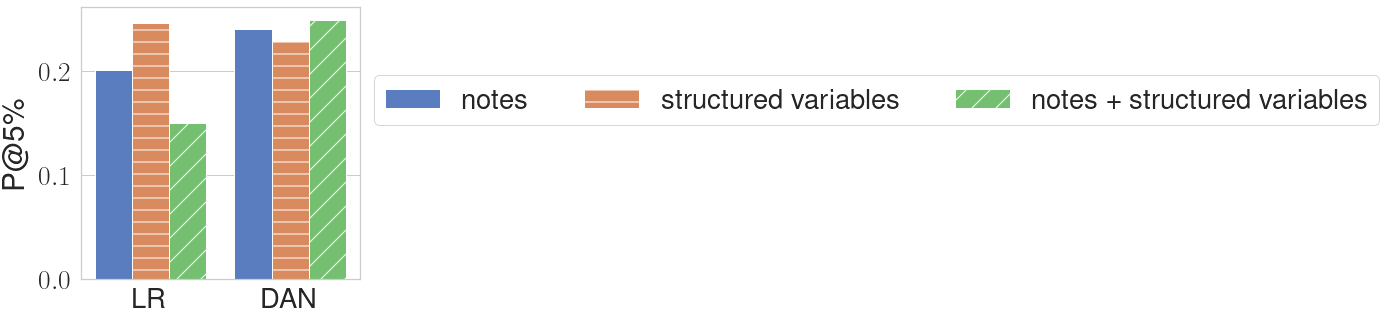

In [19]:
get_plot('readmission', ['all'],['retro'],  ['notes',"all_but_notes", "all"], ['PRAUC','ROCAUC','P@1','P@5'])